# Conformational sampling analysis: Dihedrals

Analyze conformational sampling of **SM46** (dihedrals) in octanol and gas phase.

In [20]:
import pathlib
import itertools
import pandas as pd
import seaborn as sns

All functions are collected in `dihedral_analysis.py`:

In [3]:
import dihedral_analysis

In [4]:
DATADIRS = [pathlib.Path("../_dih_analysis/"), 
            pathlib.Path("../_dih_gaff/"),
            pathlib.Path("../_dih_ligpargen/")
           ]
FIGURES = pathlib.Path("../figs/dihedrals")

FIGURES.mkdir(parents=True, exist_ok=True)

## Datafiles

### programmatic selection of data files

Save output data files in XVG format with a fixed filename that can be easily parsed for the metadata:

```
{forcefield}-{molid}-{solvent}-{interaction}-{lambda>}-{dih}-ts.xvg.bz2
```
* forcefield: cgenff, oplsaa, gaff, ligpargen
* molid: SM46, SM45, ...
* solvent: water, octanol
* lambda: 0000, 0050, ..., 0900, 1000
* dih: dih1, dih2

Files can be compressed with bzip2 or gzip.

Build a dataframe of all data files:

In [9]:
datafiles = pd.DataFrame([dihedral_analysis.get_metadata(fn) for fn in                          
                          itertools.chain(*(d.glob("*-ts.xvg*") for d in DATADIRS))], 
                          columns=["molid", "forcefield", "solvent", "interaction",
                                   "lambda", "dihedral", "filename"])
datafiles = datafiles.sort_values(by=["molid", "forcefield", "dihedral", "solvent", 
                                      "interaction", "lambda"]).reset_index(drop=True)


In [10]:
datafiles.head(3)

,molid,forcefield,solvent,interaction,lambda,dihedral,filename
0,SM46,cgenff,octanol,Coulomb,0.000,dih1,../_dih_analysis/cgenff-SM46-octanol-Coulomb-0...
1,SM46,cgenff,octanol,Coulomb,0.000,dih1,../_dih_analysis/cgenff-SM46-octanol-Coulomb-0...
2,SM46,cgenff,octanol,Coulomb,0.125,dih1,../_dih_analysis/cgenff-SM46-octanol-Coulomb-0...


In [11]:
len(datafiles)

528

Using `groupby` we can generate appropriate selections of files:

In [12]:
g = datafiles.groupby(by=["forcefield", "molid", "dihedral"])

In [13]:
g.describe()

lambda                                              \
                           count      mean       std  min     25%   50%  75%   
forcefield molid dihedral                                                      
cgenff     SM46  dih1       88.0  0.522727  0.332477  0.0  0.2375  0.55  0.8   
                 dih2       88.0  0.522727  0.332477  0.0  0.2375  0.55  0.8   
gaff       SM46  dih1       44.0  0.522727  0.334404  0.0  0.2375  0.55  0.8   
                 dih2       44.0  0.522727  0.334404  0.0  0.2375  0.55  0.8   
ligpargen  SM46  dih1       44.0  0.522727  0.334404  0.0  0.2375  0.55  0.8   
                 dih2       44.0  0.522727  0.334404  0.0  0.2375  0.55  0.8   
oplsaa     SM46  dih1       88.0  0.522727  0.332477  0.0  0.2375  0.55  0.8   
                 dih2       88.0  0.522727  0.332477  0.0  0.2375  0.55  0.8   

                                
                           max  
forcefield molid dihedral       
cgenff     SM46  dih1      1.0  
                 dih2      1.0  
gaff       SM46  dih1      1.0  
                 dih2      1.0  
ligpargen  SM46  dih1      1.0  
                 dih2      1.0  
oplsaa     SM46  dih1      1.0  
                 dih2      1.0

To get a group, use `get_group()`:

In [14]:
g.get_group(("oplsaa", "SM46", "dih1")).head()

,molid,forcefield,solvent,interaction,lambda,dihedral,filename
352,SM46,oplsaa,octanol,Coulomb,0.000,dih1,../_dih_analysis/oplsaa-SM46-octanol-Coulomb-0...
353,SM46,oplsaa,octanol,Coulomb,0.000,dih1,../_dih_analysis/oplsaa-SM46-octanol-Coulomb-0...
354,SM46,oplsaa,octanol,Coulomb,0.125,dih1,../_dih_analysis/oplsaa-SM46-octanol-Coulomb-0...
355,SM46,oplsaa,octanol,Coulomb,0.125,dih1,../_dih_analysis/oplsaa-SM46-octanol-Coulomb-0...
356,SM46,oplsaa,octanol,Coulomb,0.250,dih1,../_dih_analysis/oplsaa-SM46-octanol-Coulomb-0...


###  Build long dataframe


Make a tidy data frame with all observations:
```molid forcefield solvent interaction lambda dihedral angle```: one data point (angle) per line (`dihedral_analysis.extract()`)

Pad the data with periodic copies so that we can easily do correct distributions and KDEs (use `dihedral_analysis.periodic()` ).

### How to extract datasets from a long dataframe with groupby

Get the data set with groupby and get_group():

In [15]:
wCoul = datafiles.groupby(by=["molid", "forcefield", "solvent", "interaction", "dihedral"]).get_group(
    ("SM46", "oplsaa", "water", "Coulomb", "dih1"))
wCoul

,molid,forcefield,solvent,interaction,lambda,dihedral,filename
398,SM46,oplsaa,water,Coulomb,0.00,dih1,../_dih_analysis/oplsaa-SM46-water-Coulomb-000...
399,SM46,oplsaa,water,Coulomb,0.00,dih1,../_dih_analysis/oplsaa-SM46-water-Coulomb-000...
400,SM46,oplsaa,water,Coulomb,0.25,dih1,../_dih_analysis/oplsaa-SM46-water-Coulomb-025...
401,SM46,oplsaa,water,Coulomb,0.25,dih1,../_dih_analysis/oplsaa-SM46-water-Coulomb-025...
402,SM46,oplsaa,water,Coulomb,0.50,dih1,../_dih_analysis/oplsaa-SM46-water-Coulomb-050...
403,SM46,oplsaa,water,Coulomb,0.50,dih1,../_dih_analysis/oplsaa-SM46-water-Coulomb-050...
404,SM46,oplsaa,water,Coulomb,0.75,dih1,../_dih_analysis/oplsaa-SM46-water-Coulomb-075...
405,SM46,oplsaa,water,Coulomb,0.75,dih1,../_dih_analysis/oplsaa-SM46-water-Coulomb-075...
406,SM46,oplsaa,water,Coulomb,1.00,dih1,../_dih_analysis/oplsaa-SM46-water-Coulomb-100...
407,SM46,oplsaa,water,Coulomb,1.00,dih1,../_dih_analysis/oplsaa-SM46-water-Coulomb-100...


In [16]:
df = dihedral_analysis.extract(wCoul, step=100)

100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


In [18]:
df

,solvent,interaction,lambda,dihedral,angle
0,water,Coulomb,0.0,dih1,-224.999
1,water,Coulomb,0.0,dih1,-224.974
2,water,Coulomb,0.0,dih1,-224.956
3,water,Coulomb,0.0,dih1,-224.861
4,water,Coulomb,0.0,dih1,-224.855
...,...,...,...,...,...
996,water,Coulomb,1.0,dih1,33.239
997,water,Coulomb,1.0,dih1,63.972
998,water,Coulomb,1.0,dih1,65.883
999,water,Coulomb,1.0,dih1,70.759


<AxesSubplot:xlabel='angle', ylabel='Density'>

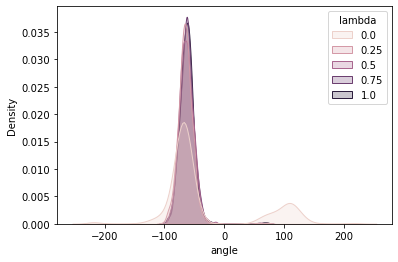

In [21]:
sns.kdeplot(x="angle", hue="lambda", data=df, bw_method="scott", common_norm=False,fill=True,  multiple="layer")

## Violinplots

### Plotting function
Seaborn categorical plots are useful to automatically generate facet grids, including ones with violins:


Plot all data for a molecule, forcefield, and dihedral:

- Needs the `datafiles` dataframe to find the filenames.
- Extracts the data (can take a while).
- Plots dihedral distributions in a split violin plot.
- Uses a stride of 100 (`step=100`) by default; test if more data improves the violins.
- Saves the file in `FIGDIR` with a generated filename `{molid}_{forcefield}_{dihedral}_violins.pdf"`

See `dihedral_analysis.dihedral_violins()` for the plotting code.

`dihedral_analysis.plot_violins()` extracts and plots.

## SM46

Plot the two primary dihedrals of SM46 for different force fields:

### OPLSAA (mol2ff)

100%|██████████| 88/88 [00:59<00:00,  1.47it/s]


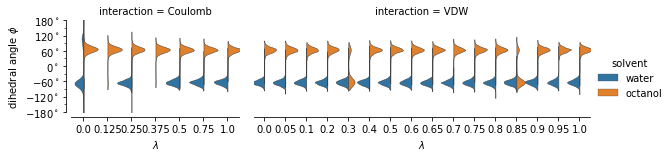

In [22]:
dihedral_analysis.plot_violins(datafiles, "SM46", "oplsaa", "dih1", width=1.2)

100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Violin plot saved to ../figs/dihedrals/SM46_oplsaa_dih2_violins.pdf.


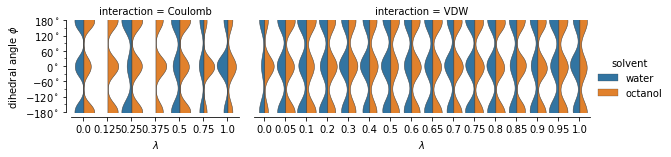

In [474]:
dihedral_analysis.plot_violins(datafiles, "SM46", "oplsaa", "dih2")

### CGENFF

100%|██████████| 44/44 [00:39<00:00,  1.11it/s]


Violin plot saved to ../figs/dihedrals/SM46_cgenff_dih1_violins.pdf.


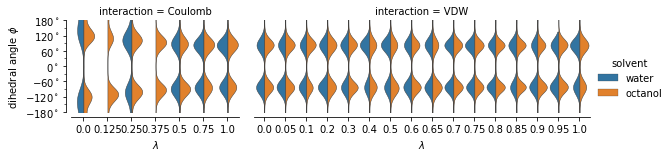

In [475]:
dihedral_analysis.plot_violins(datafiles, "SM46", "cgenff", "dih1")

100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Violin plot saved to ../figs/dihedrals/SM46_cgenff_dih2_violins.pdf.


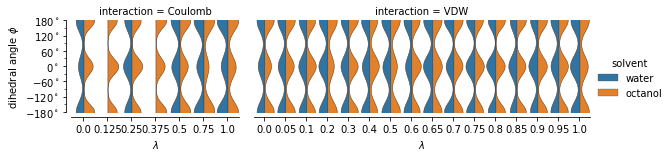

In [476]:
dihedral_analysis.plot_violins(datafiles, "SM46", "cgenff", "dih2")

### GAFF

100%|██████████| 44/44 [00:23<00:00,  1.89it/s]


Violin plot saved to ../figs/dihedrals/SM46_gaff_dih1_violins.pdf.


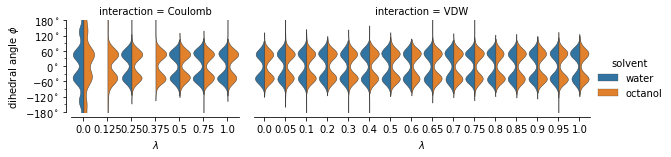

In [21]:
dihedral_analysis.plot_violins(datafiles, "SM46", "gaff", "dih1")

100%|██████████| 44/44 [00:23<00:00,  1.89it/s]


Violin plot saved to ../figs/dihedrals/SM46_gaff_dih2_violins.pdf.


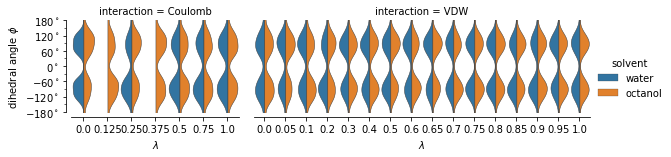

In [22]:
dihedral_analysis.plot_violins(datafiles, "SM46", "gaff", "dih2")

### OPLSAA (LigParGen)

100%|██████████| 44/44 [00:11<00:00,  3.81it/s]


Violin plot saved to ../figs/dihedrals/SM46_ligpargen_dih1_violins.pdf.


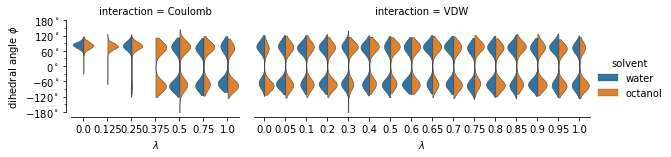

In [23]:
dihedral_analysis.plot_violins(datafiles, "SM46", "ligpargen", "dih1")

100%|██████████| 44/44 [00:13<00:00,  3.26it/s]


Violin plot saved to ../figs/dihedrals/SM46_ligpargen_dih2_violins.pdf.


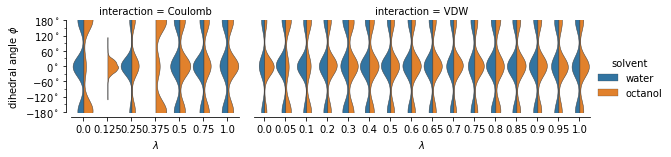

In [24]:
dihedral_analysis.plot_violins(datafiles, "SM46", "ligpargen", "dih2")